# Stable Diffusion
paper：[High-Resolution Image Synthesis with Latent Diffusion Models](https://ieeexplore.ieee.org/document/9878449)  
论文源码：[https://github.com/CompVis/latent-diffusion](https://github.com/CompVis/latent-diffusion)  
收录于：CVPR 2022  
参考文档：[https://huggingface.co/CompVis/stable-diffusion-v1-4](https://huggingface.co/CompVis/stable-diffusion-v1-4)  
&emsp;&emsp;&emsp;&emsp;&emsp;[https://huggingface.co/blog/stable_diffusion](https://huggingface.co/blog/stable_diffusion)  

In [ ]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

import matplotlib.pyplot as plt

In [2]:
model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda:1"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)

Fetching 16 files: 100%|██████████| 16/16 [00:00<00:00, 18782.22it/s]


In [3]:
num_image = 9  # 生成图像的数量
prompt = "a photo of an astronaut riding a horse on mars"  # 文本
images = pipe([prompt] * num_image,       # 如果只生成一张图片的话, pipe(prompt) 即可; 多张就是 pipe([prompt] * n)
              num_inference_steps=100,    # 推理步数, 默认为 50
              guidance_scale=7.5).images  # 指导度, 默认为 7.5

100%|██████████| 101/101 [00:46<00:00,  2.17it/s]


In [4]:
print(images)

[<PIL.Image.Image image mode=RGB size=512x512 at 0x7F35C3171910>, <PIL.Image.Image image mode=RGB size=512x512 at 0x7F35C31717F0>, <PIL.Image.Image image mode=RGB size=512x512 at 0x7F35C3148850>, <PIL.Image.Image image mode=RGB size=512x512 at 0x7F35C3148C40>, <PIL.Image.Image image mode=RGB size=512x512 at 0x7F35C3148A30>, <PIL.Image.Image image mode=RGB size=512x512 at 0x7F35C3148CA0>, <PIL.Image.Image image mode=RGB size=512x512 at 0x7F35C31489D0>, <PIL.Image.Image image mode=RGB size=512x512 at 0x7F35C3148CD0>, <PIL.Image.Image image mode=RGB size=512x512 at 0x7F35C3148C10>]


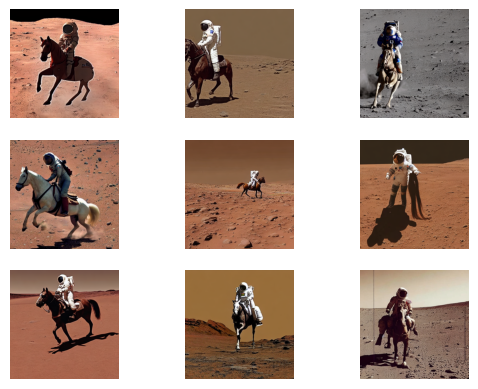

In [5]:
# 显示图片
for i in range(num_image):
    plt.subplot(int(num_image**0.5), int(num_image**0.5), i + 1)  #表示第i张图片，下标只能从1开始，不能从0
    plt.imshow(images[i])
    plt.axis('off')  # 去掉横纵坐标
plt.show()

In [6]:
# 保存图片
for i in range(len(images)):
    images[i].save('image_{}.png'.format(i))  # 保存地址